<a href="https://colab.research.google.com/github/eduswiss/hands-on-algorithmic-trading-with-python/blob/main/notebooks/02_Processing_data_with_Pandas_and_NumPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROCESSING DATA

## Import Modules

Need to import some important Python libraries and methods that you will need to process financial data and perform data analysis.

Numpy is a Python library used for numerical computations using multidimensional arrays and complex mathematical functions.

The requests module enables you to easily download files from the web. It has a get method that takes a string of a URL to download.

The JavaScript Object Notation (JSON) module enables you to convert a string of JSON data into a Python dictionary via the loads method.

Pandas is a Python library that is built from the ground-up to do financial data analysis. It has a dataframe object that makes it easy to analyze tabular data traditionally done using spreadsheets.

Matplotlib is a Python library used for visualizing data. Pandas provides a wrapper to the library so you can plot nice charts with a single line of code.

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import requests
import json

## Process Data

Step 1: Use the get method of the requests module to download data from Alphavantage's website. This returns data as a JSON string, their default data format. Import the JSON string into a dictionary using the loads method of the JSON module. List the keys of the dictionary using the keys method so that you can extract the relevant time series.

In [2]:
response = requests.get("https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&apikey=demo")
alphadict = json.loads(response.text)
alphadict.keys()

dict_keys(['Meta Data', 'Time Series (Daily)'])

Step 2: Extract the time series using the relevant key and put it in a pandas dataframe for easier processing and analysis of data. Review the dataframe object using the info method.

In [3]:
stock = pd.DataFrame(alphadict['Time Series (Daily)']).T
stock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 2020-10-06 to 2020-05-15
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   1. open    100 non-null    object
 1   2. high    100 non-null    object
 2   3. low     100 non-null    object
 3   4. close   100 non-null    object
 4   5. volume  100 non-null    object
dtypes: object(5)
memory usage: 4.7+ KB


In [4]:
type(stock.index)

pandas.core.indexes.base.Index

Step 3: Convert pandas default dataframe index attribute into a datetime index attribute so that you have a standard time series

In [5]:
stock.index = pd.to_datetime(stock.index)
type(stock.index)

pandas.core.indexes.datetimes.DatetimeIndex

Step 4: Check the data by inspecting one of the columns in the dataframe. In the example below, you will get a key error if you try to extract data from any of the columns in the dataframe at this stage. The reason for the key error is that the column name is the string '4. close' and not 'close'. Create user-friendly column names using the column attribute

In [6]:
stock['close']

KeyError: ignored

In [7]:
stock.columns

Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')

In [8]:
stock.columns = ['open', 'high', 'low', 'close', 'volume']
stock.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

Step 5: Continue inspecting the data. You will get an error when you try to plot the values in the dataframe because the values are strings and not numeric data. Convert string data in the dataframe into real numbers using astype(float) method

In [9]:
stock['close'].plot(figsize=(20,5), title='Microsoft (MSFT) daily closing prices'), plt.show();

TypeError: ignored

In [10]:
type(stock['close'][1])

str

In [11]:
stock = stock.astype(float)
type(stock['close'][1])

numpy.float64

## Sample Data


Step 6: Check the quality of your data by getting samples from your dataframe using the sample, head and tail methods

In [12]:
sample = stock.sample(10)
sample

,open,high,low,close,volume
2020-08-21,213.86,216.2500,212.85,213.02,36249319.0
2020-09-02,227.97,232.8600,227.35,231.65,34080839.0
2020-06-16,192.89,195.5800,191.46,193.57,42556656.0
2020-08-10,211.67,211.8800,206.35,208.25,36716462.0
2020-06-23,202.09,203.9500,201.43,201.91,30917447.0
2020-07-15,209.56,211.3300,205.03,208.04,32248893.0
2020-09-04,215.10,218.3599,205.19,214.25,59664072.0
2020-05-15,179.06,187.0600,177.00,183.16,46610382.0
2020-07-31,204.40,205.1000,199.01,205.01,51247969.0
2020-06-05,182.62,187.7300,182.01,187.20,39893643.0


In [13]:
sample.head()

,open,high,low,close,volume
2020-08-21,213.86,216.25,212.85,213.02,36249319.0
2020-09-02,227.97,232.86,227.35,231.65,34080839.0
2020-06-16,192.89,195.58,191.46,193.57,42556656.0
2020-08-10,211.67,211.88,206.35,208.25,36716462.0
2020-06-23,202.09,203.95,201.43,201.91,30917447.0


In [14]:
sample.tail()

,open,high,low,close,volume
2020-07-15,209.56,211.3300,205.03,208.04,32248893.0
2020-09-04,215.10,218.3599,205.19,214.25,59664072.0
2020-05-15,179.06,187.0600,177.00,183.16,46610382.0
2020-07-31,204.40,205.1000,199.01,205.01,51247969.0
2020-06-05,182.62,187.7300,182.01,187.20,39893643.0


## Summarise Data

In [15]:
summary = stock.describe()
summary

,open,high,low,close,volume
count,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,203.395650,205.915917,200.786902,203.488000,3.447371e+07
std,11.905708,11.949764,11.490825,11.705203,1.075925e+07
min,179.060000,181.990000,176.600000,181.400000,1.795894e+07
25%,195.787500,199.100000,194.277500,196.712500,2.754842e+07
50%,205.540000,208.740000,202.255000,205.030000,3.245287e+07
75%,210.685000,213.430000,208.105000,210.847500,3.781085e+07
max,229.270000,232.860000,227.350000,231.650000,7.898301e+07


## Visualise Data

Step 7: Use the plot method to visualize your time series data.

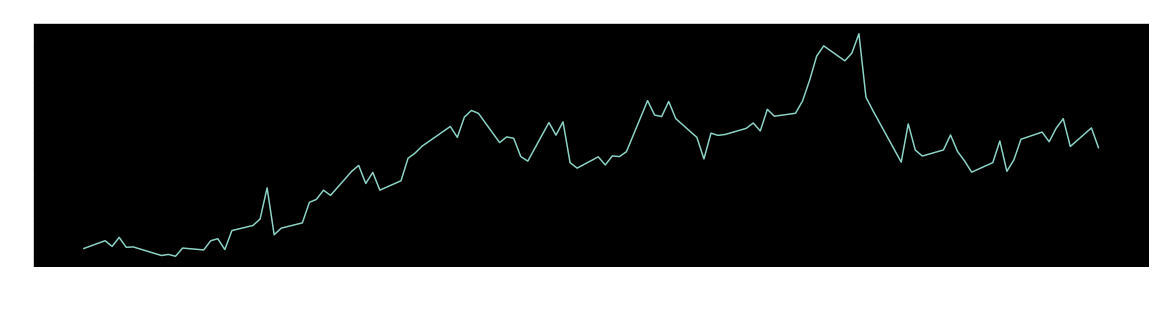

In [16]:
stock['close'].plot(figsize=(20,5), title='Microsoft (MSFT) daily closing prices'), plt.show();

## Exploring Signals

Step 8: As you can see from the above sampling of data, the current time series is in descending order, with the most recent date at the top. However, many of the methods we will use to explore signals require the time series to be in ascending order. For instance, if you plot a moving average, it will be give you the wrong signal as seen below. Use the sort_index method to flip the time series upside down so that it is in ascending order. Recalculate the two moving averages.

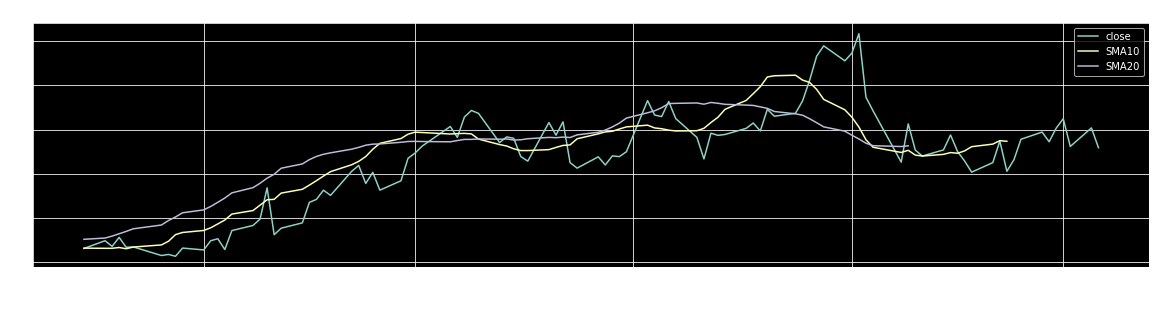

In [17]:
SMA10 = 10
SMA20 = 20
stock['SMA10'] = stock['close'].rolling(SMA10).mean()
stock['SMA20'] = stock['close'].rolling(SMA20).mean()
stock[['close','SMA10','SMA20']].plot(figsize=(20,5), grid = True, title='The 10 and 20 day simple moving averages of Microsoft'), plt.show();

## Some more issue with importing data

In [18]:
stock.head()

,open,high,low,close,volume,SMA10,SMA20
2020-10-06,208.82,210.18,204.82,205.91,28554261.0,NaN,NaN
2020-10-05,207.22,210.41,206.98,210.38,21331561.0,NaN,NaN
2020-10-02,208.00,210.99,205.54,206.19,33154781.0,NaN,NaN
2020-10-01,213.49,213.99,211.32,212.46,27158418.0,NaN,NaN
2020-09-30,207.73,211.98,206.54,210.33,33829088.0,NaN,NaN


In [19]:
stock = stock.sort_index(ascending = True)
stock.head()

,open,high,low,close,volume,SMA10,SMA20
2020-05-15,179.06,187.06,177.00,183.16,46610382.0,183.233,185.2280
2020-05-18,185.75,186.20,183.96,184.91,35306620.0,183.200,185.5170
2020-05-19,185.03,186.60,183.49,183.63,26799116.0,183.200,185.9500
2020-05-20,184.81,185.85,183.94,185.66,31261334.0,183.373,186.4805
2020-05-21,185.40,186.67,183.29,183.43,29032741.0,183.099,187.0135


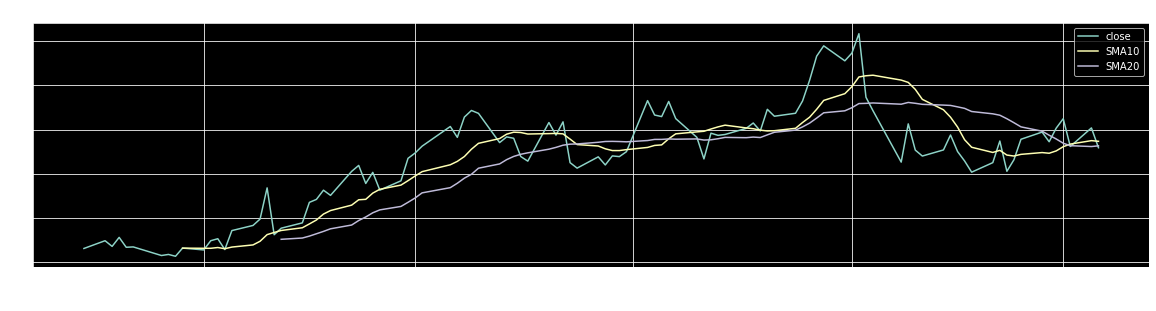

In [20]:
stock['SMA10'] = stock['close'].rolling(SMA10).mean()
stock['SMA20'] = stock['close'].rolling(SMA20).mean()
stock[['close','SMA10','SMA20']].plot(figsize=(20,5), grid = True, title='The 10 and 20 day simple moving averages of Microsoft'), plt.show();

Step 9: Since you need a rolling window of 20 days to calculate a 20-day moving average, you will have some rows of NaN (Not a Number) values in the dataframe. You can get rid of the NaN rows using the `dropna` method.

In [21]:
stock.head()

,open,high,low,close,volume,SMA10,SMA20
2020-05-15,179.06,187.06,177.00,183.16,46610382.0,NaN,NaN
2020-05-18,185.75,186.20,183.96,184.91,35306620.0,NaN,NaN
2020-05-19,185.03,186.60,183.49,183.63,26799116.0,NaN,NaN
2020-05-20,184.81,185.85,183.94,185.66,31261334.0,NaN,NaN
2020-05-21,185.40,186.67,183.29,183.43,29032741.0,NaN,NaN


              open    high     low   close      volume    SMA10     SMA20
2020-06-12  190.54  191.72  185.18  187.74  43373587.0  187.223  185.2280
2020-06-15  184.58  190.82  184.01  188.94  32770189.0  187.834  185.5170
2020-06-16  192.89  195.58  191.46  193.57  42556656.0  188.700  185.9500
2020-06-17  195.03  196.32  193.69  194.24  25687822.0  189.588  186.4805
2020-06-18  194.00  196.49  194.00  196.32  23061648.0  190.928  187.0135


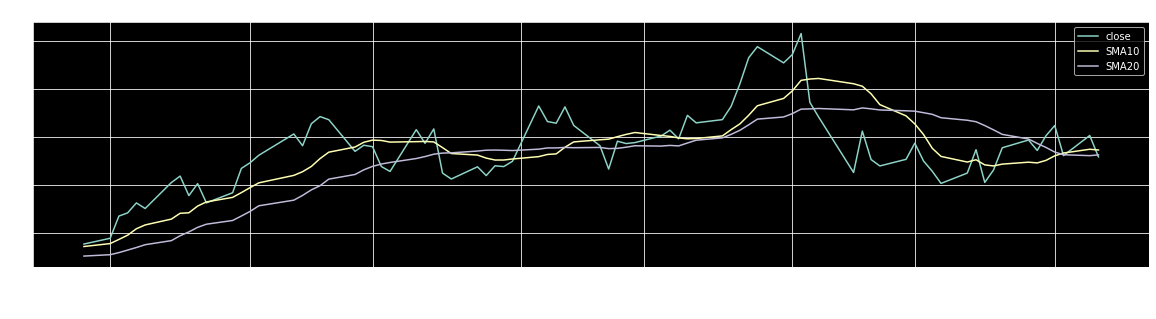

In [22]:
stock.dropna(inplace=True)
print(stock.head())
stock[['close','SMA10','SMA20']].plot(figsize=(20,5), grid = True, title='The 10 and 20 day simple moving averages of Microsoft'), plt.show();